In [21]:
# Calling essential modules

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from feature_engine.encoding import RareLabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


from catboost import Pool, CatBoostClassifier

import itertools
import shap

pd.set_option('display.max_rows', 1000)

In [22]:
# Loading dataset
try :
    rawDF = pd.read_csv("dft-road-casualty-statistics-casualty-provisional-mid-year-unvalidated-2022 (1).csv")
    rawDF.head()

except Exception as e:
    print(e)


In [23]:
# Checking missing values
rawDF.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61352 entries, 0 to 61351
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   status                              61352 non-null  object
 1   accident_index                      61352 non-null  object
 2   accident_year                       61352 non-null  int64 
 3   accident_reference                  61352 non-null  object
 4   vehicle_reference                   61352 non-null  int64 
 5   casualty_reference                  61352 non-null  int64 
 6   casualty_class                      61352 non-null  int64 
 7   sex_of_casualty                     61352 non-null  int64 
 8   age_of_casualty                     61352 non-null  int64 
 9   age_band_of_casualty                61352 non-null  int64 
 10  casualty_severity                   61352 non-null  int64 
 11  pedestrian_location                 61352 non-null  in

In [24]:
# Understanding shape of Data
print(f"The dataframe has {rawDF.shape[0]} rows and {rawDF.shape[1]} columns")


The dataframe has 61352 rows and 20 columns


In [25]:
rawDF.nunique()


status                                    1
accident_index                        48283
accident_year                             1
accident_reference                    48283
vehicle_reference                        11
casualty_reference                       18
casualty_class                            3
sex_of_casualty                           4
age_of_casualty                         102
age_band_of_casualty                     12
casualty_severity                         3
pedestrian_location                      11
pedestrian_movement                      10
car_passenger                             5
bus_or_coach_passenger                    7
pedestrian_road_maintenance_worker        4
casualty_type                            22
casualty_home_area_type                   4
casualty_imd_decile                      11
lsoa_of_casualty                      23841
dtype: int64

In [26]:
rawDF.describe()


,accident_year,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
count,61352.0,61352.000000,61352.000000,61352.000000,61352.000000,61352.000000,61352.000000,61352.000000,61352.000000,61352.000000,61352.000000,61352.000000,61352.000000,61352.000000,61352.000000,61352.000000
mean,2022.0,1.450368,1.333779,1.482299,1.368790,36.670312,6.288157,2.783039,0.800316,0.645325,0.222047,0.048507,0.032860,9.475160,1.091032,4.337674
std,0.0,1.109855,0.981507,0.735614,0.534536,19.574357,2.463082,0.442318,2.197167,2.009611,0.615127,0.426419,0.261327,16.662727,0.903365,3.158496
min,2022.0,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,1.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2022.0,1.000000,1.000000,1.000000,1.000000,22.000000,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000
50%,2022.0,1.000000,1.000000,1.000000,1.000000,34.000000,6.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,4.000000
75%,2022.0,2.000000,1.000000,2.000000,2.000000,50.000000,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,7.000000
max,2022.0,227.000000,148.000000,3.000000,9.000000,101.000000,11.000000,3.000000,10.000000,9.000000,9.000000,9.000000,2.000000,98.000000,3.000000,10.000000


In [27]:
# Checking null values
rawDF.isnull().sum()


status                                0
accident_index                        0
accident_year                         0
accident_reference                    0
vehicle_reference                     0
casualty_reference                    0
casualty_class                        0
sex_of_casualty                       0
age_of_casualty                       0
age_band_of_casualty                  0
casualty_severity                     0
pedestrian_location                   0
pedestrian_movement                   0
car_passenger                         0
bus_or_coach_passenger                0
pedestrian_road_maintenance_worker    0
casualty_type                         0
casualty_home_area_type               0
casualty_imd_decile                   0
lsoa_of_casualty                      0
dtype: int64

In [28]:
# Checking any duplicancy
if not rawDF.duplicated().any():
    df = rawDF

else :
    df = rawDF.drop(rawDF.duplicated())


# Descriptive Statistics

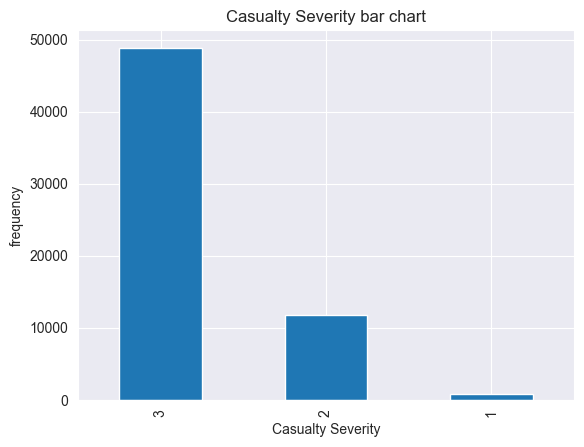

In [29]:
# Plotting casualty_severity
df['casualty_severity'].value_counts().plot(kind='bar')
plt.title('Casualty Severity bar chart')
plt.xlabel('Casualty Severity')
plt.ylabel('frequency')
plt.show()


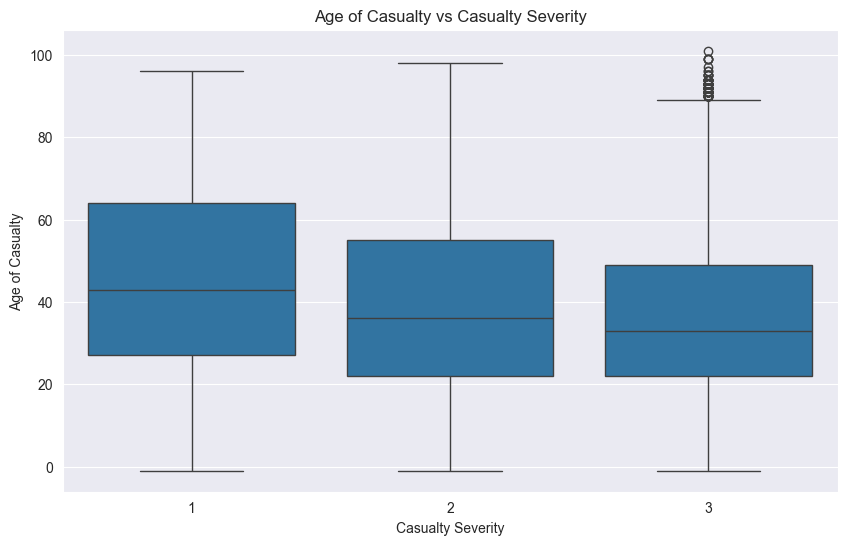

In [30]:
# Relationship between 'casualty_severity' and 'age_of_casualty'
plt.figure(figsize=(10,6))
sns.boxplot(x='casualty_severity', y='age_of_casualty', data=df)
plt.title('Age of Casualty vs Casualty Severity')
plt.xlabel('Casualty Severity')
plt.ylabel('Age of Casualty')
plt.show()


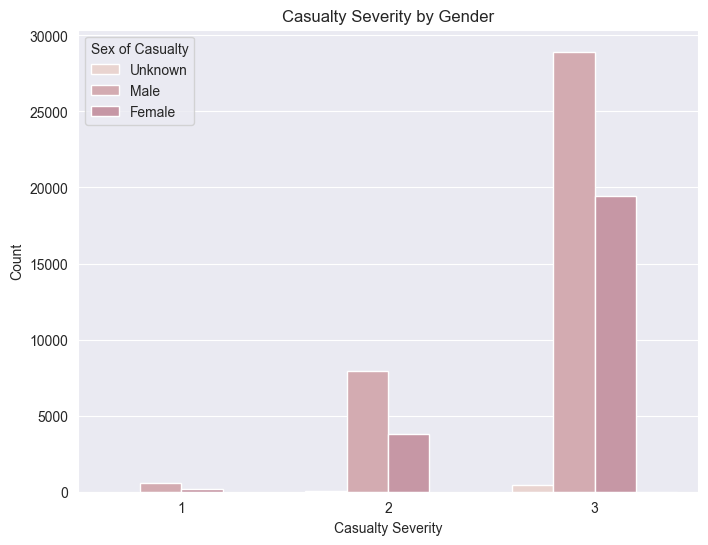

In [31]:
# Relationship between casualty severity and gender
plt.figure(figsize=(8, 6))
sns.countplot(x='casualty_severity', hue='sex_of_casualty', data=df)
plt.title('Casualty Severity by Gender')
plt.xlabel('Casualty Severity')
plt.ylabel('Count')
plt.legend(title='Sex of Casualty', labels=['Unknown', 'Male', 'Female'])
plt.show()


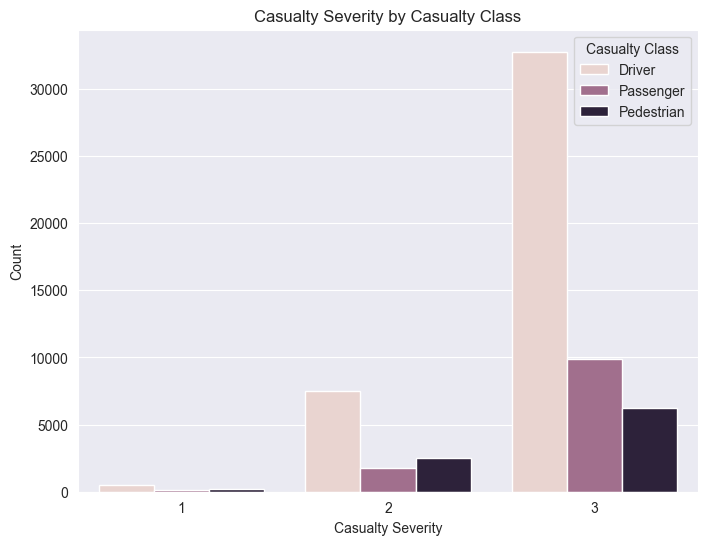

In [32]:
# Relationship between casualty severity and casualty class
plt.figure(figsize=(8, 6))
sns.countplot(x='casualty_severity', hue='casualty_class', data=df)
plt.title('Casualty Severity by Casualty Class')
plt.xlabel('Casualty Severity')
plt.ylabel('Count')
plt.legend(title='Casualty Class', labels=['Driver', 'Passenger', 'Pedestrian'])
plt.show()


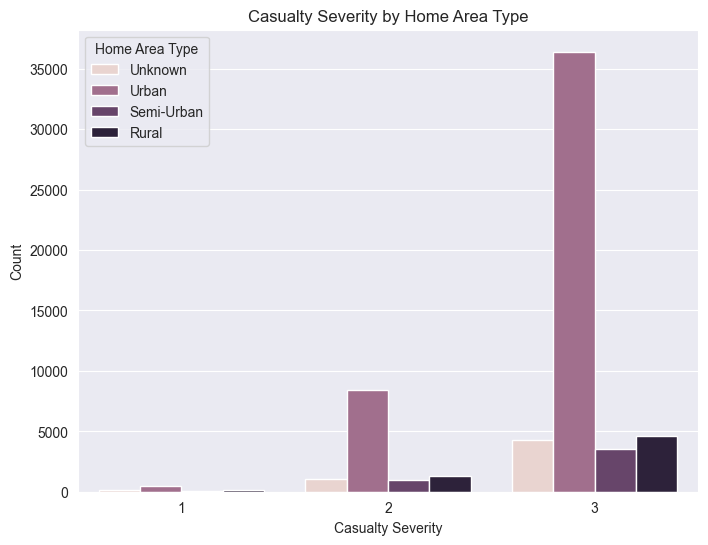

In [33]:
# Plot the relationship between casualty severity and casualty's home area type
plt.figure(figsize=(8, 6))
sns.countplot(x='casualty_severity', hue='casualty_home_area_type', data=df)
plt.title('Casualty Severity by Home Area Type')
plt.xlabel('Casualty Severity')
plt.ylabel('Count')
plt.legend(title='Home Area Type', labels=['Unknown', 'Urban', 'Semi-Urban', 'Rural'])
plt.show()


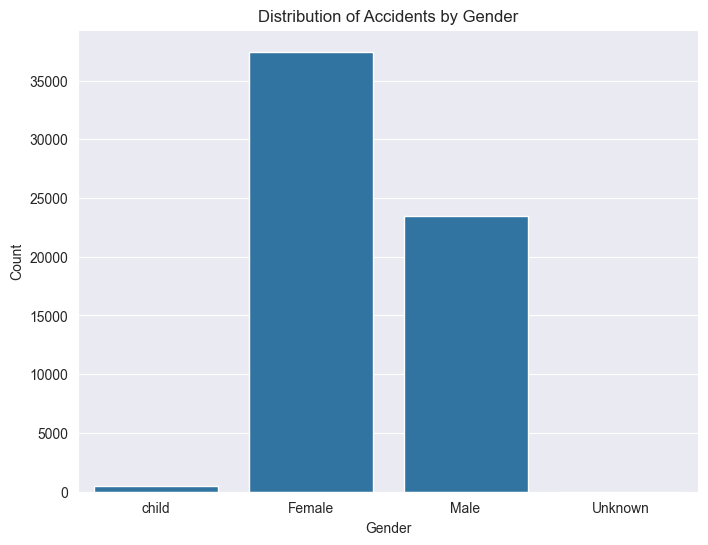

In [34]:
# Plot the distribution of accidents by gender
plt.figure(figsize=(8, 6))
sns.countplot(x='sex_of_casualty', data=df)
plt.title('Distribution of Accidents by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks([0, 1, 2, 3], ['child', 'Female','Male', "Unknown"])
plt.show()


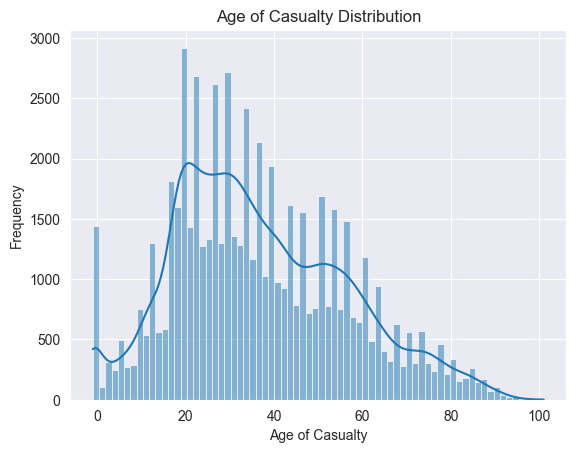

In [35]:
# Let's visualize the distribution of 'age_of_casualty'
sns.histplot(df['age_of_casualty'], kde=True)
plt.title('Age of Casualty Distribution')
plt.xlabel('Age of Casualty')
plt.ylabel('Frequency')
plt.show()


# Correlation

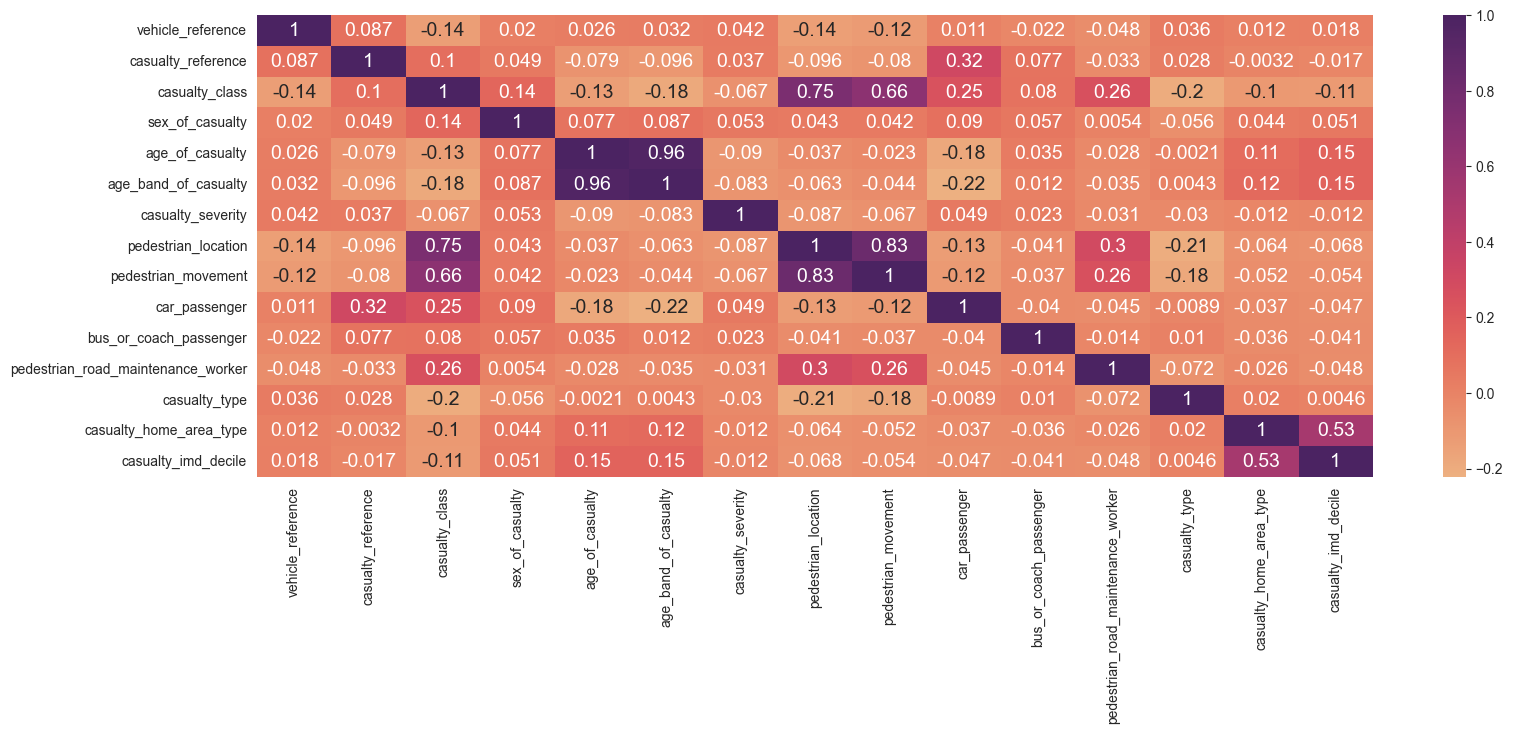

In [36]:
# Correlation of features
dfDropped = df.drop(columns=["status", "lsoa_of_casualty", "accident_index", "accident_year", 'accident_reference'], axis=1)
fig, ax = plt.subplots( figsize = (18,6) )
corrMatrix = dfDropped.corr()
corrHeatmap = sns.heatmap(corrMatrix, cmap = "flare", annot=True, annot_kws={"size": 14})
plt.show()


# Data transformation

In [37]:
# select main label
mainLabel = 'is_severe'
df[mainLabel] = (df['casualty_severity']<3).astype(int)
# bin age to larger bins


def convertAge(x):
    if x == -1:
        return 'None'
    return str(5*round(1/5*x))


df['age_of_casualty'] = df['age_of_casualty'].apply(convertAge)

# convert columns to string
for col in ['sex_of_casualty', 'pedestrian_location', 'pedestrian_movement', 'car_passenger',
            'bus_or_coach_passenger', 'pedestrian_road_maintenance_worker', 'casualty_type', 'casualty_class',
            'casualty_home_area_type', 'casualty_imd_decile', 'vehicle_reference', 'casualty_reference']:

    df[col] = df[col].astype(str)

# set up the rare label encoder limiting number of categories to max_n_categories
for col in ['sex_of_casualty', 'age_of_casualty', 'pedestrian_location', 'pedestrian_movement',
            'car_passenger', 'bus_or_coach_passenger', 'pedestrian_road_maintenance_worker',
            'casualty_type', 'casualty_class', 'casualty_home_area_type', 'casualty_imd_decile',
            'vehicle_reference', 'casualty_reference']:
    df[col] = df[col].fillna('None')
    encoder = RareLabelEncoder(n_categories=1, max_n_categories=60, replace_with='Other', tol=20/df.shape[0])
    df[col] = encoder.fit_transform(df[[col]])

# finally, drop unused columns
colsDrop = ['accident_year', 'status', 'accident_index', 'accident_year', 'casualty_severity',
             'accident_reference', 'age_band_of_casualty', 'lsoa_of_casualty']

df = df.drop(colsDrop, axis=1)
print(df.shape)
df.sample(5)

(61352, 14)


,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,is_severe
47350,1,1,2,1,20,0,0,1,0,0,9,-1,-1,0
43894,1,1,3,1,65,6,9,0,0,0,0,1,3,0
13536,2,1,1,1,50,0,0,0,0,0,9,3,5,0
10466,1,2,2,1,25,0,0,2,0,0,9,1,2,0
33563,1,1,1,1,65,0,0,0,0,0,9,1,1,1


# ML

In [38]:
# initialize data
y = df[mainLabel].values.reshape(-1,)
X = df.drop([mainLabel], axis=1)
catCols = df.select_dtypes(include=['object']).columns
catColsIndex = [list(X.columns).index(c) for c in catCols]
XTrain,XTest,yTrain,yTest = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
XTrain.shape, XTest.shape, yTrain.shape, yTest.shape

((49081, 13), (12271, 13), (49081,), (12271,))

In [39]:
# add class weights to handle imbalanced classes
classes = np.unique(yTrain)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=yTrain)
classWeights = dict(zip(classes, weights))
print(classWeights)

{0: 0.6282126766332173, 1: 2.449885195168214}


In [40]:
# initialize Pool
trainPool = Pool(XTrain,
                  yTrain,
                  cat_features=catColsIndex)
testPool = Pool(XTest,
                 yTest,
                 cat_features=catColsIndex)
# specify the training parameters
model = CatBoostClassifier(iterations=650,
                           depth=5,
                           border_count=20,
                           l2_leaf_reg=0.4,
                           learning_rate=4e-2,
                           class_weights=classWeights,
                           verbose=0)

#train the model
model.fit(trainPool)
# make the prediction using the resulting model
yTrainPred = model.predict_proba(trainPool)[:,1]
yTestPred = model.predict_proba(testPool)[:,1]
roc_auc_train = roc_auc_score(yTrain, yTrainPred)
roc_auc_test = roc_auc_score(yTest, yTestPred)
print(f"ROC AUC score for train {round(roc_auc_train,4)}, and for test {round(roc_auc_test,4)}")


ROC AUC score for train 0.7002, and for test 0.6936


In [41]:
# calculating the baseline ROC AUC score assuming the same probability from training labels to test
rocAucBaseline = roc_auc_score(yTest, [np.mean(yTrain)]*len(yTest))
print(f"Baseline of roc AUC = {rocAucBaseline}")


Baseline of roc AUC = 0.5


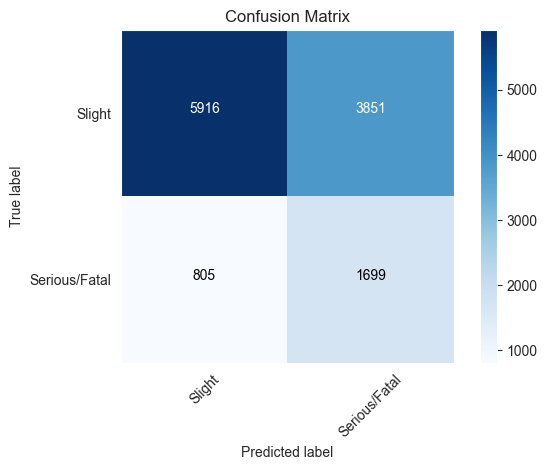

In [42]:
# plotting confusion matrix
def plotConfusionMatrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    This function plots a confusion matrix.

    Parameters:
        cm (array-like): Confusion matrix as returned by sklearn.metrics.confusion_matrix.
        classes (list): List of class names, e.g., ['Class 0', 'Class 1'].
        title (str): Title for the plot.
        cmap (matplotlib colormap): Colormap for the plot.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tickMarks = np.arange(len(classes))
    plt.xticks(tickMarks, classes, rotation=45)
    plt.yticks(tickMarks, classes)
    plt.grid(None)

    fmt = '.0f'
    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Get the confusion matrix
cm = confusion_matrix(yTest, (yTestPred > 0.5))

# Plot the confusion matrix
classNames = ['Slight', 'Serious/Fatal'] # positive class should come the last
plotConfusionMatrix(cm, classNames)


# SHAP

Average severe accident probability is 0.2041


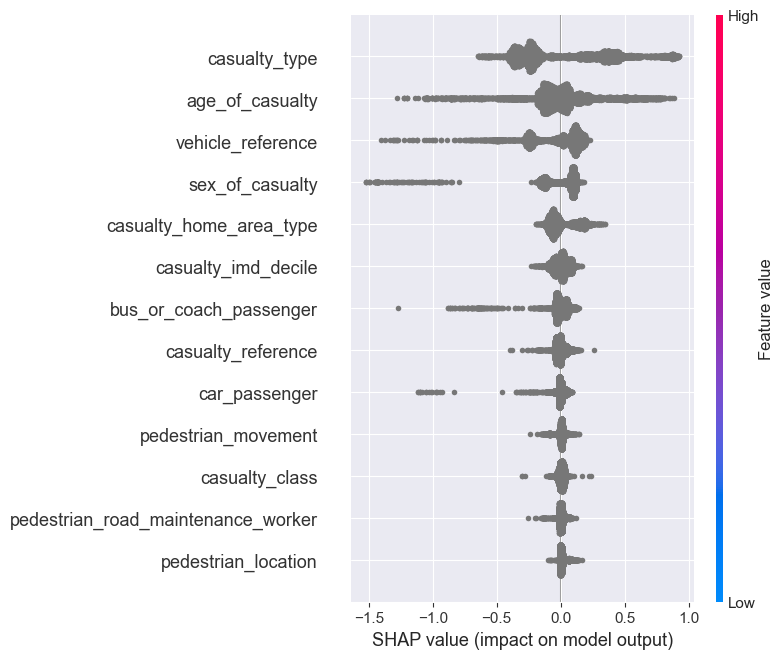

In [43]:
shap.initjs()
ex = shap.TreeExplainer(model)
print(f"Average severe accident probability is {round(np.mean(yTest),4)}")
shapValues = ex.shap_values(XTest)
shap.summary_plot(shapValues, XTest, max_display=30)
